# Cohomology

The BATS interface for cohomology is currently under development.

Let's look at the cohomology algorithm applied to a Vietoris-Rips filtration

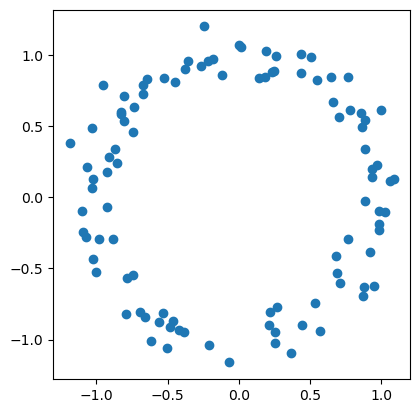

In [1]:
import bats
import numpy as np
import matplotlib.pyplot as plt
import time

n = 100
np.random.seed(0)
X = np.random.normal(size=(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,2), scale = 0.1 )
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')
plt.show(fig)

The standard interface for computing persistent homology is through `bats.reduce`

In [2]:
R = bats.RipsFiltration(bats.DataSet(bats.Matrix(X)), bats.Euclidean(), np.inf, 2)
t0 = time.monotonic()
RR = bats.reduce(R, bats.F2(), bats.standard_reduction_flag(), bats.clearing_flag())
t1 = time.monotonic()
print("{} sec. elapsed".format(t1 - t0))

0.260012122002081 sec. elapsed


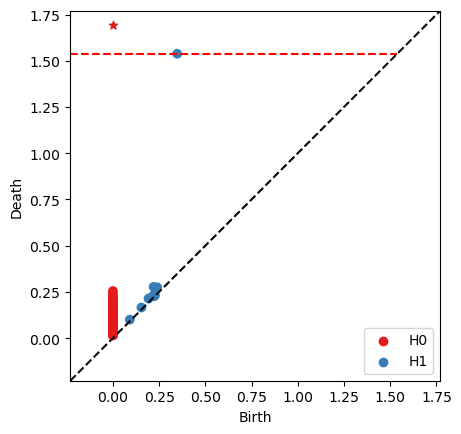

In [3]:
ps = RR.persistence_pairs(0) + RR.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

In [4]:
for p in ps:
    if p.length() > 0.5:
        print(p)

0 : (0,inf) <0,-1>
1 : (0.347661,1.53775) <477,36355>


Currently, to compute cohomology, we create a `FilteredDGVectorSpace` (Filtered differential graded vector space) of degree +1.

In [5]:
t0 = time.monotonic()
RC = bats.FilteredF2DGVectorSpace(R, +1)
t1 = time.monotonic()
print("{} sec. elapsed".format(t1 - t0))

0.05527746499865316 sec. elapsed


We can then obtain a reduced DGVS

In [6]:
t0 = time.monotonic()
RRC = bats.ReducedFilteredF2DGVectorSpace(RC, bats.standard_reduction_flag(), bats.clearing_flag())
t1 = time.monotonic()
print("{} sec. elapsed".format(t1 - t0))

0.016537620998860803 sec. elapsed


We see here that we obtain the same persistence barcode

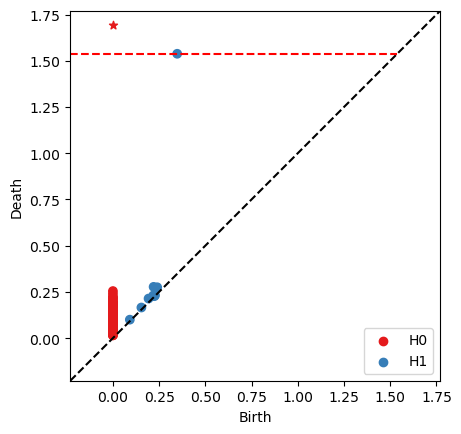

In [7]:
ps = RRC.persistence_pairs(0) + RRC.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

In [8]:
for p in ps:
    if p.length() > 0.5:
        print(p)

0 : (0,inf) <0,-1>
1 : (0.347661,1.53775) <477,36355>


You can use the same optimzation flags as you can with `ChainComplexes`.  For Vietoris-Rips filtrations, standard reduction with the clearing optimization tends to perform best.

In [9]:
flags = [
    (bats.standard_reduction_flag(),),
    (bats.standard_reduction_flag(), bats.clearing_flag()),
    (bats.extra_reduction_flag(),),
    (bats.extra_reduction_flag(), bats.clearing_flag()),
    
]

for fs in flags:
    print("\n")
    print(*fs)
    t0 = time.monotonic()
    RC = bats.FilteredF2DGVectorSpace(R, +1)
    RRC = bats.ReducedFilteredF2DGVectorSpace(RC, *fs)
    t1 = time.monotonic()
    print("Cohomology: {} sec. elapsed".format(t1 - t0))
    tco = t1 - t0

    t0 = time.monotonic()
    RR = bats.reduce(R, bats.F2(), *fs)
    t1 = time.monotonic()
    print("Homology:   {} sec. elapsed".format(t1 - t0))
    tho = t1 - t0

    print("{} ratio".format(tco/tho))



Cohomology: 8.077598232004675 sec. elapsed
Homology:   0.2805818199994974 sec. elapsed
28.788744160327795 ratio


<bats.linalg.standard_reduction_flag object at 0x7ffb70890530> <bats.linalg.clearing_flag object at 0x7ffb70890570>
Cohomology: 0.06173948499781545 sec. elapsed
Homology:   0.293913795001572 sec. elapsed
0.2100598408369544 ratio


Cohomology: 0.22504864599613938 sec. elapsed
Homology:   0.25382902700221166 sec. elapsed
0.8866150914811587 ratio


<bats.linalg.extra_reduction_flag object at 0x7ffb708905f0> <bats.linalg.clearing_flag object at 0x7ffb70890630>
Cohomology: 0.22575879400392296 sec. elapsed
Homology:   0.22911387599742739 sec. elapsed
0.9853562688907498 ratio


## Levelset Example

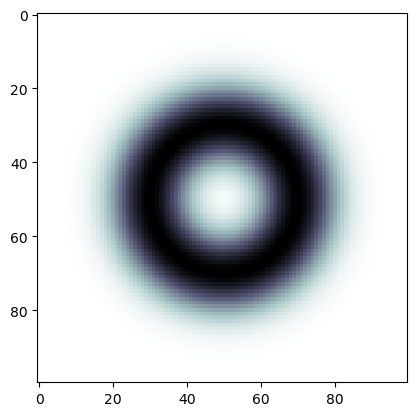

In [10]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
img = np.empty((n,n))

def rad(i,j, n):
    return np.sqrt((i - n/2)**2 + (j - n/2)**2)

for i in range(n):
    for j in range(n):
#         print(i,j, rad(i,j,n))
        img[i,j] = 1-np.exp(-(rad(i,j,n) - 20)**2/100)

plt.imshow(img, cmap='bone')
plt.show()

Standard reduction:

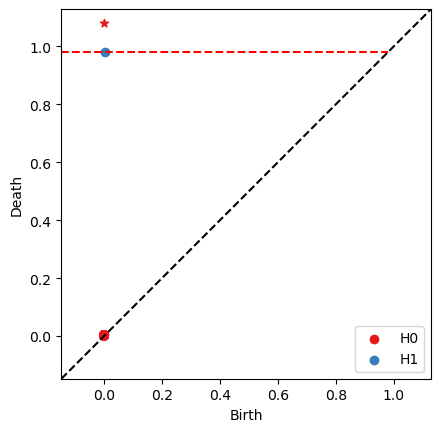

In [11]:
X = bats.Freudenthal(n, n)
vals, imax = bats.lower_star_filtration(X, img.flatten()) # computes filtration parameter to
F = bats.Filtration(X, vals)

RF = bats.reduce(F, bats.F2())
ps = RF.persistence_pairs(0) + RF.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

cohomology:

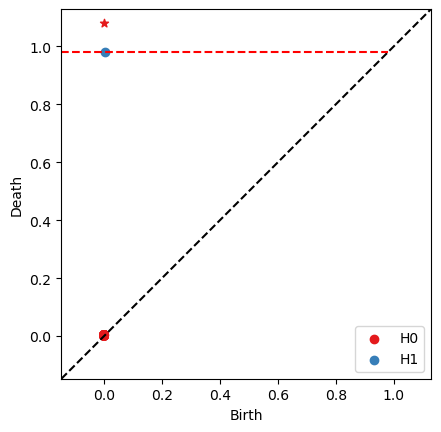

In [12]:
FC = bats.FilteredF2DGVectorSpace(F, +1)
RF = bats.ReducedFilteredF2DGVectorSpace(FC, *fs)
ps = RF.persistence_pairs(0) + RF.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

For levelset filtrations, cohomology may not perform better than homology:

In [13]:
flags = [
    (bats.standard_reduction_flag(),),
    (bats.standard_reduction_flag(), bats.clearing_flag()),
    (bats.extra_reduction_flag(),),
    (bats.extra_reduction_flag(), bats.clearing_flag()),
    
]

for fs in flags:
    print("\n")
    print(*fs)
    t0 = time.monotonic()
    RC = bats.FilteredF2DGVectorSpace(F, +1)
    RRC = bats.ReducedFilteredF2DGVectorSpace(RC, *fs)
    t1 = time.monotonic()
    print("Cohomology: {} sec. elapsed".format(t1 - t0))
    tco = t1 - t0

    t0 = time.monotonic()
    RR = bats.reduce(F, bats.F2(), *fs)
    t1 = time.monotonic()
    print("Homology:   {} sec. elapsed".format(t1 - t0))
    tho = t1 - t0

    print("{} ratio".format(tco/tho))



Cohomology: 0.06967114299914101 sec. elapsed
Homology:   0.049795851002272684 sec. elapsed
1.399135502191964 ratio


<bats.linalg.standard_reduction_flag object at 0x7ffb708819f0> <bats.linalg.clearing_flag object at 0x7ffb70881a30>
Cohomology: 0.04750711200176738 sec. elapsed
Homology:   0.020269027998438105 sec. elapsed
2.3438278345379064 ratio


Cohomology: 0.06759179900109302 sec. elapsed
Homology:   0.03991230500105303 sec. elapsed
1.693507779099947 ratio


<bats.linalg.extra_reduction_flag object at 0x7ffb70881ab0> <bats.linalg.clearing_flag object at 0x7ffb70881af0>
Cohomology: 0.04434516499895835 sec. elapsed
Homology:   0.02141492500231834 sec. elapsed
2.070759761902394 ratio


### Updating Filtrations

You can also update `ReducedFilteredDGVectorSpace` objects with new filtration values

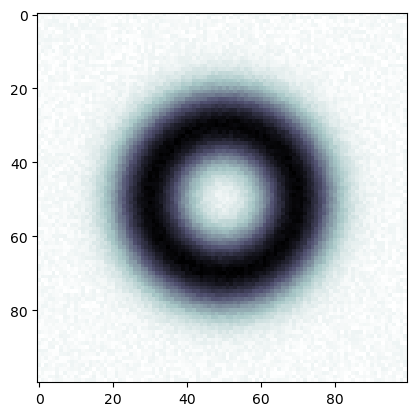

In [14]:
np.random.seed(0)
img2 = img + 0.05*np.random.rand(*(img.shape))

plt.imshow(img2, cmap='bone')
plt.show()

In [15]:
degree = +1 # hohomology
# need to compute basis for update.
flags = (bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())

# original filtration
X = bats.Freudenthal(n, n)
vals, imax = bats.lower_star_filtration(X, img.flatten()) # computes filtration parameter to
F = bats.Filtration(X, vals)

t0 = time.monotonic()
CF = bats.FilteredF2DGVectorSpace(F, degree)
RF = bats.ReducedFilteredF2DGVectorSpace(CF, *flags)
t1 = time.monotonic()
print("{:.3f} sec. to reduce".format(t1 - t0))
ps1 = RF.persistence_pairs(0) + RF.persistence_pairs(1)


vals2, imap2 = bats.lower_star_filtration(X, img2.flatten()) # computes filtration parameter to
t0 = time.monotonic()
RF.update_filtration(vals2)
t1 = time.monotonic()
print("{:.3f} sec. to update".format(t1 - t0))
ps2 = RF.persistence_pairs(0) + RF.persistence_pairs(1)

0.187 sec. to reduce
0.046 sec. to update


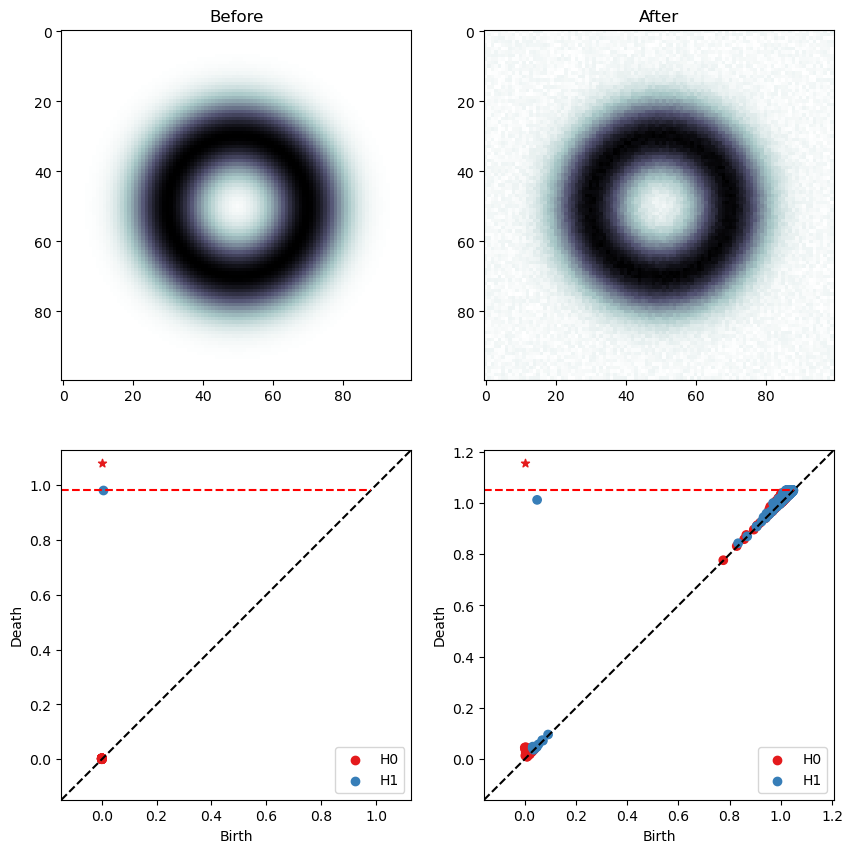

In [16]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(img, cmap='bone')
ax[0,0].set_title('Before')
ax[0,1].imshow(img2, cmap='bone')
ax[0,1].set_title('After')
bats.persistence_diagram(ps1, ax=ax[1,0])
bats.persistence_diagram(ps2, ax=ax[1,1])


plt.show(fig)